# LDA Iris Demo

Notebook from [Eric Elmoznino](https://github.com/EricElmoznino/lighthouse_dimensionality_reduction_tutorial).

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import seaborn as sns
sns.set(style='whitegrid', context='talk')

In [7]:
iris = datasets.load_iris()

X = iris.data
y = iris.target

target_names = iris.target_names
feature_names = ['sepal length in cm', 
                 'sepal width in cm', 
                 'petal length in cm', 
                 'petal width in cm']

In [8]:
df = pd.DataFrame(X, columns=feature_names)
df['class'] = target_names[y]

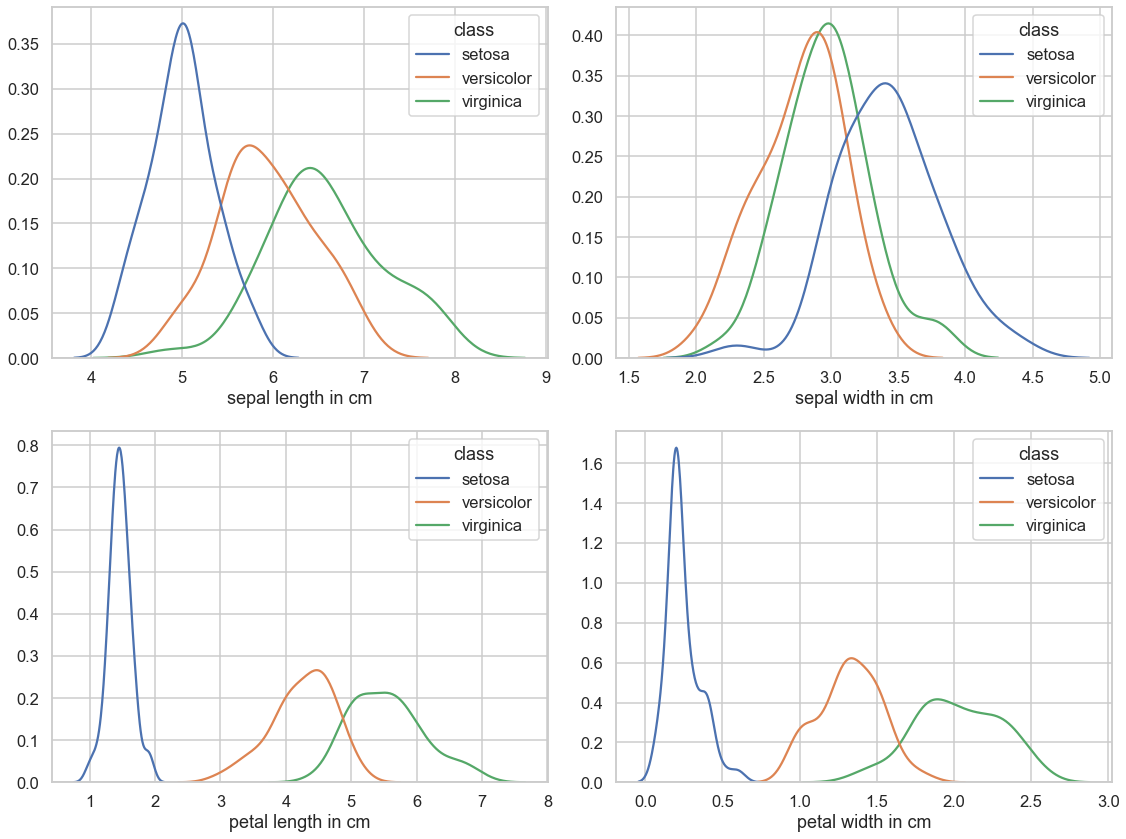

In [9]:
fig, axs = plt.subplots(2, 2, figsize=(16, 12))
for i in range(2):
    for j in range(2):
        sns.kdeplot(hue='class', x=feature_names[i*2 + j], data=df, ax=axs[i, j])
        axs[i, j].set_ylabel('')

fig.tight_layout()

In [10]:
#Perform LDA
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(X, y)
X_reduced = lda.transform(X)

In [16]:
lda_feature_names = ['LDA dim=1', 'LDA dim=2']

df_reduced = pd.DataFrame(X_reduced, columns=lda_feature_names)
df_reduced['class'] = target_names[y]
df_reduced

,LDA dim=1,LDA dim=2,class
0,8.061800,0.300421,setosa
1,7.128688,-0.786660,setosa
2,7.489828,-0.265384,setosa
3,6.813201,-0.670631,setosa
4,8.132309,0.514463,setosa
...,...,...,...
145,-5.645003,1.677717,virginica
146,-5.179565,-0.363475,virginica
147,-4.967741,0.821141,virginica
148,-5.886145,2.345091,virginica


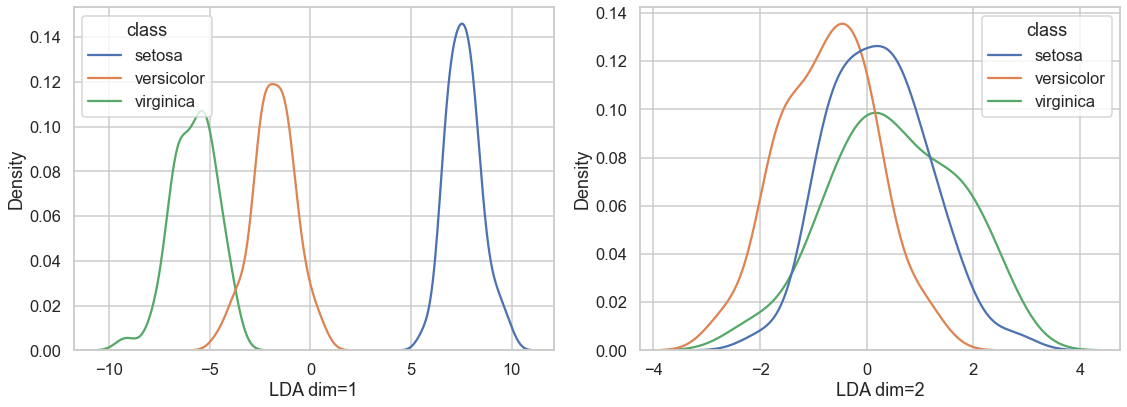

In [15]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6))
for i in range(2):
    sns.kdeplot(hue='class', x=lda_feature_names[i], data=df_reduced, ax=axs[i])
    axs[i].set_ylabel('')
        
fig.tight_layout()

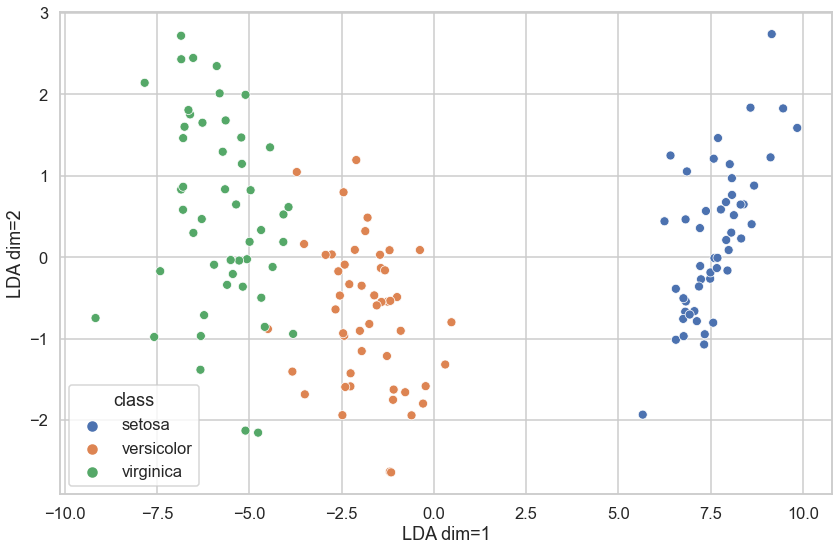

In [12]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.scatterplot(x=lda_feature_names[0], y=lda_feature_names[1], hue='class', data=df_reduced, ax=ax)

fig.tight_layout()